In [1]:
  import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


Load Dataset

In [5]:
df = pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Prepare data

In [6]:
X = df.drop(['id','diagnosis'], axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Linear SVM

In [7]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))


Linear SVM Accuracy: 0.956140350877193


RBF SVM with tuning

In [8]:
param_grid = {'C':[0.1,1,10], 'gamma':[0.01,0.1,1]}
svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
svm_rbf.fit(X_train, y_train)
print("Best Params:", svm_rbf.best_params_)
print("RBF SVM Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))

Best Params: {'C': 10, 'gamma': 0.01}
RBF SVM Accuracy: 0.9824561403508771


PCA visualization

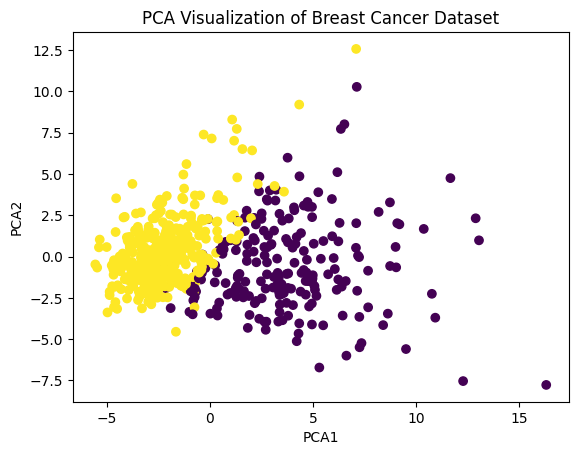

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=pd.factorize(y)[0])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA Visualization of Breast Cancer Dataset")
plt.show()